---
title: "capstonecasestudy"
author: "Amadu"
date: "2024-08-05"
output:
  html_document: default
---


## WELCOME TO MY CAPSTONE CASE STUDY!
I completed this case study in completion of my google data analytic course I hope you like it
feel free to leave any comment or sugestion for inprovement.

### 1.  SUMMARY

Bellabeat is a women-centric tech and wellness company which develops wearables and accompanying 
products that monitor biometric and lifestyle data to help women better understand how their 
bodies work, and as a result, make healthier lifestyle choices.

Together with the Bellabeat app, users are able to gain insights with health data related 
to their activity, sleep, stress, fitness, heart rate, reproductive health and mindfulness 
habits.

The goal of the case study is to analyze how non-Bellabeat consumers use their smart fitness 
devices. With this information, we are to provide high-level recommendations for how these 
insights can inform Bellabeat's marketing strategy.

### Business Approach
Bellabeat emphasizes the integration of wellness and technology, aiming to provide women 
with tools that empower them to take control of their health. The company's products are 
designed to be stylish and versatile, allowing users to wear them in various ways that fit 
their personal style. Bellabeat also focuses on using data analytics to provide personalized 
health insights and recommendations, enhancing the user experience and promoting overall well-being.

### Problem Statement

***How can a wellness company play it smart?***
In this case study, you will perform data analysis for Bellabeat, a high-tech manufacturer 
of health-focused products for women. You will analyze smart device data to gain insight into 
how consumers are using their smart devices. Your analysis will help guide future marketing 
strategies for your team. Along the way, you will perform numerous real-world tasks of a junior 
data analyst by following the steps of the data analysis process: Ask, Prepare, Process, Analyze,
Share, and Act. By the time you are done, you will have a portfolio-ready case study to help you 
demonstrate your knowledge and skills to potential employers!

### 2.  Ask phase

*  Business Task 
The aim of the case study is to analyze how non-Bellabeat consumers use their smart 
fitness devices. With this information, we are to provide high-level recommendations
for how these insights can inform Bellabeat's marketing strategy around the following
questions:

*  What are some trends in smart device usage?
*  How could these trends apply to Bellabeat customers?
*  How could these trends help influence Bellabeat marketing strategy?

### 3.  Prepare Phase

*  Dataset used: 
The FitBit Fitness Tracker dataset (CC0: Public Domain) will be used for this 
analysis. It is made available on Kaggle by the user, Mobius.

### Accessibility and privacy of data: 
The data is licensed under CC0: Public Domain, waiving all of his or her rights
to the work worldwide under copyright law, including all related and neighboring
rights, to the extend by law. The work can be copied, modified, distributed and 
perform the work, even for commercial purposes, all without asking permission.

### Information about our dataset:
The dataset is generated by respondents to a distributed survey via Amazon 
Mechanical Turk over 31 days between 03.12.2016 - 05.12.2016. Thirty eligible 
Fitbit users consented to the submission of personal tracker data, including 
minute-level output for physical activity, heart rate, and sleep monitoring. 
Variation between output represents use of different types of Fitbit trackers
and individual tracking behaviors / preferences.

### Data Organization and verification: 
The dataset is a collection of 18 .csv files. 15 in long format, 3 in wide format. 
The datasets consists of wide-ranging information from activity metrics, calories, 
sleep records, metabolic equivalent of tasks (METs), heart rate and steps; in 
timeframes of seconds, minutes, hours and days. Several data frames will not 
be used for the analysis because of the following reasons:

*  They are subsets of larger, more complete data frames.
*  They are in a minute-level output.
*  They are too small of a sample size to provide credible insights.

### Data Limitations:
*  No Metadata Provided: 
Information such as location, lifestyle, weather, temperature, humidity etc.   would 
provide a deeper context to the data obtained.

*  Missing Demographics: 
Key demographics data such as gender, age, were not identified. This is a crucial missing information sine Bellabeat creates women-centric products. Insights obtained may not reflect the differences in physiology and activity patterns between different demographic groups. However, we understand such information is under a strict privacy policy.

*  Small Sample Size: 
Thirty users is not an ideal sample size where multiple independent variables are involved. 
Especially when health and lifestyle data is varied across different facets of society. 
Insights gained may not apply to all.

*  Data Collection Period: 
31 days of data between 03.12.2016 - 05.12.2016 is limited in providing high-level
recommendations. Seasonal trends impacts heavily on user activity and lifestyle choices. 
E.g. User's excercise habits differ between summer and winter.

### 4. Process Phase 

Data processing, analysis and visualization will all be done in R Programming with R Studio.

### Install packages and run libraries 

The following packages will be used for our analysis: 'tidyverse', 'here', 'skimr', 'lubridate', 'janitor', 'viridis', 'ggpubr', 'scales', 'waffles', 'ggrepel', 'ggplot2'.


In [1]:
library(dplyr)
library(tidyverse)
library(ggpubr)
library(lubridate)
library(skimr)
library(janitor)
library(viridis)
library(scales)
library(waffle)
library(ggrepel)
library(ggplot2)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from 

### Importing datasets

*  The following tables will be used:

-  dailyActivity_merged.csv
-  dailyCalories_merged.csv
-  dailyIntensities_merged.csv
-  sleepDay_merged.csv
-  weightLogInfo_merged.csv

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


### Exploring data sets
we are going to use some functions for our data exploration so we can get an idea about the datasets

In [3]:
head(daily_activity)
colnames(daily_activity)
str(daily_activity)

head(daily_calories)
colnames(daily_calories)
str(daily_calories)

head(daily_intensities)
colnames(daily_intensities)
str(daily_intensities)

head(sleep_day)
colnames(sleep_day)
str(sleep_day)

head(weight)
colnames(weight)
str(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


[1] "Id"          "ActivityDay" "Calories"

'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

'data.frame':	940 obs. of  10 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


### 4. Cleaning datasets

I noticed one  in the weight tables with lots of NA so i decided to delete that column.

In [4]:
weight <- weight %>% 
  select(-Fat)

In [5]:

daily_calories <- daily_calories %>%
  distinct() %>%
  drop_na()

daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()

daily_intensities <- daily_intensities %>%
  distinct() %>%
  drop_na()

sleep_day <- sleep_day %>%
  distinct() %>%
  drop_na()

weight <- weight %>%
  distinct() %>%
  drop_na()

### Using the clean_names() function 
let's use the clean_names() function to make the column names consistence this will make coding efficient and easy to read 

In [6]:
sleep_day <- clean_names(sleep_day)
daily_activity <- clean_names(daily_activity)
daily_intensities <- clean_names(daily_intensities)
daily_calories <- clean_names(daily_calories)
weight <- clean_names(weight)

One of the column in our sleep dataset is using the same name as our variable "sleep_day" so we're going to change the name of this column to sleep_date since it is the date column. and do the same for the rest of the datasets date columns.

In [7]:
sleep_day <- sleep_day %>% 
  rename(sleep_date = sleep_day)
daily_calories <- daily_calories %>% 
  rename(activity_date = activity_day)
daily_intensities <- daily_intensities %>% 
  rename(activity_date = activity_day)

### Fixing formatting dates
I spotted some problems with the timestamp data. So before analysis, I need to convert it to date time
format. 

In [8]:

daily_activity$activity_date=as.POSIXct(daily_activity$activity_date, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$activity_date, format = "%m/%d/%y")
daily_activity$activity_date=as.Date(daily_activity$activity_date, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date=as.Date(daily_activity$date, format="%m/%d/%Y")

daily_intensities$activity_date=as.Date(daily_intensities$activity_date, format="%m/%d/%Y", tz=Sys.timezone())

sleep_day$sleep_date=as.POSIXct(sleep_day$sleep_date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$sleep_date, format = "%m/%d/%y")
sleep_day$date=as.Date(sleep_day$date, "% m/% d/% y")


### Verification that date and time colums have been formatted


In [9]:
class(daily_calories$activity_date)
class(daily_intensities$activity_date)
class(daily_activity$activity_date)
class(sleep_day$sleep_date)
class(weight$date)

[1] "character"

[1] "Date"

[1] "Date"

[1] "POSIXct" "POSIXt"

[1] "character"

### Summarizing the dataset (Analyze Phase)

Now that all the data is stored appropriately and has been prepared for analysis, I can start putting it to
work. Let’s look at the total number of participants in each data sets:


In [10]:
n_distinct(daily_activity$id)

[1] 33

In [11]:
n_distinct(daily_calories$id)

[1] 33

In [12]:
n_distinct(daily_intensities$id)

[1] 33

In [13]:
n_distinct(sleep_day$id)

[1] 24

In [14]:
n_distinct(weight$id)

[1] 8

So, there are 33 participants in daily_activity, daily_calories and daily_intensities 
data sets. 24 participants in the Sleep data. And only 8 participants for the weight data 
set, 8 participants are
not significant to make any recommendations and conclusions based on the dataset.
So I will focus my analysis on daily_activity, daily_calories and daily_intensities. 
although the minimum is 30 participants I will work on the sleep_day data set for demonstration.

### Here are some quick summary statistics about each data frame

***daily_activity summary***

In [15]:
daily_activity %>%
  select(total_steps,
         total_distance,
         sedentary_minutes, calories) %>%
  summary()

  total_steps    total_distance   sedentary_minutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0    Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8    1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5    Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2    Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5    3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0    Max.   :4900  

***Exploring the number of Intense active participants:***
daily intensities

In [16]:
daily_intensities %>%
  select(very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes) %>%
  summary()

 very_active_minutes fairly_active_minutes lightly_active_minutes
 Min.   :  0.00      Min.   :  0.00        Min.   :  0.0         
 1st Qu.:  0.00      1st Qu.:  0.00        1st Qu.:127.0         
 Median :  4.00      Median :  6.00        Median :199.0         
 Mean   : 21.16      Mean   : 13.56        Mean   :192.8         
 3rd Qu.: 32.00      3rd Qu.: 19.00        3rd Qu.:264.0         
 Max.   :210.00      Max.   :143.00        Max.   :518.0         
 sedentary_minutes
 Min.   :   0.0   
 1st Qu.: 729.8   
 Median :1057.5   
 Mean   : 991.2   
 3rd Qu.:1229.5   
 Max.   :1440.0   

***Daily calories summary***

In [17]:
daily_calories %>%
  select(calories) %>%
  summary()

    calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

***For the sleep record***

In [18]:
sleep_day %>%
  select(total_sleep_records, total_minutes_asleep, total_time_in_bed) %>%
  summary()

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

***For the weiht data frame***


In [19]:
weight %>% 
  select(weight_kg, bmi) %>% 
  summary()

   weight_kg           bmi       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

### Key findings from this analysis :

**Too Much Sitting:** People are sitting for over 16 hours a day on average, which is 
too high. This indicates a need for strategies to encourage more movement.

**Low Physical Activity:** Most people are only lightly active, meaning they don’t move 
much beyond basic daily activities. Combined with long sitting periods, this shows
they need to be more active.

**Average Sleep:** On average, people sleep about 7 hours a night, which is generally 
acceptable but doesn’t address physical activity.

**Steps per Day:** People are walking around 7,638 steps a day. This is less than the CDC’s 
recommendation of 8,000 steps a day, which can significantly lower the risk of health 
problems. More steps (up to 12,000) are even better for reducing health risks.

### Merging some data :

Before beginning to visualize the data, I’m going to merge two data sets : Activity and 
Sleep data on columns id. Note that there are more participant Ids in the Activity 
dataset than in the Sleep dataset. So if I use the merge option inner_joint, then 
I will have the number of participants from the Sleep data set.
*Take a look:*

*** Inner Joint***

In [20]:
Combined_data_inner <- merge(sleep_day, daily_activity, by="id")
n_distinct(Combined_data_inner$id)

[1] 24


For analysis, I will consider using ‘outer_join’ to keep all participants in the dataset.
And I can do that by adding in my code chunk the extra argument all=TRUE.

In [21]:
Combined_data_outer <- merge(sleep_day, daily_activity, by="id", all = TRUE)
n_distinct(Combined_data_outer$id)

[1] 33

### Data visualization (Share and Act Phases)

Now let’s visualize some key explorations.
Relationship between Steps and Sedentary time
What’s the relationship between steps taken in a day and sedentary minutes?


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


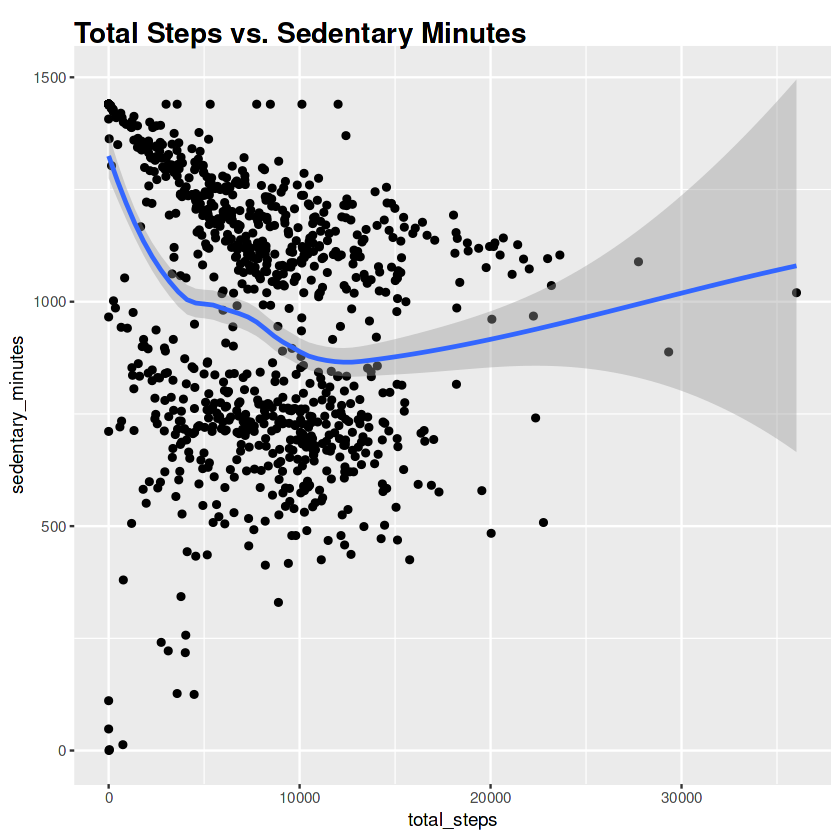

In [22]:
ggplot(data=daily_activity, aes(x=total_steps, y=sedentary_minutes)) + geom_point() + 
geom_smooth() + theme(plot.title = element_text(size = rel(1.5), face="bold", vjust=-1)) +
labs(title = "Total Steps vs. Sedentary Minutes")

As you can see there is a negative correlation between Steps and Sedentary time. The more Sedentary
time you have, the less Steps you’re taking during the day. This data shows that the company need to
market more to customers with high Sedentary time. And to do that, the company needs to find ways to
educate customers about the important of walking more and also incouragethem to set a daily step goal with notification informing them about their progress doing the day.

### Relationship between Minutes Asleep and Time in Bed
What’s the relationship between minutes asleep and time in bed?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


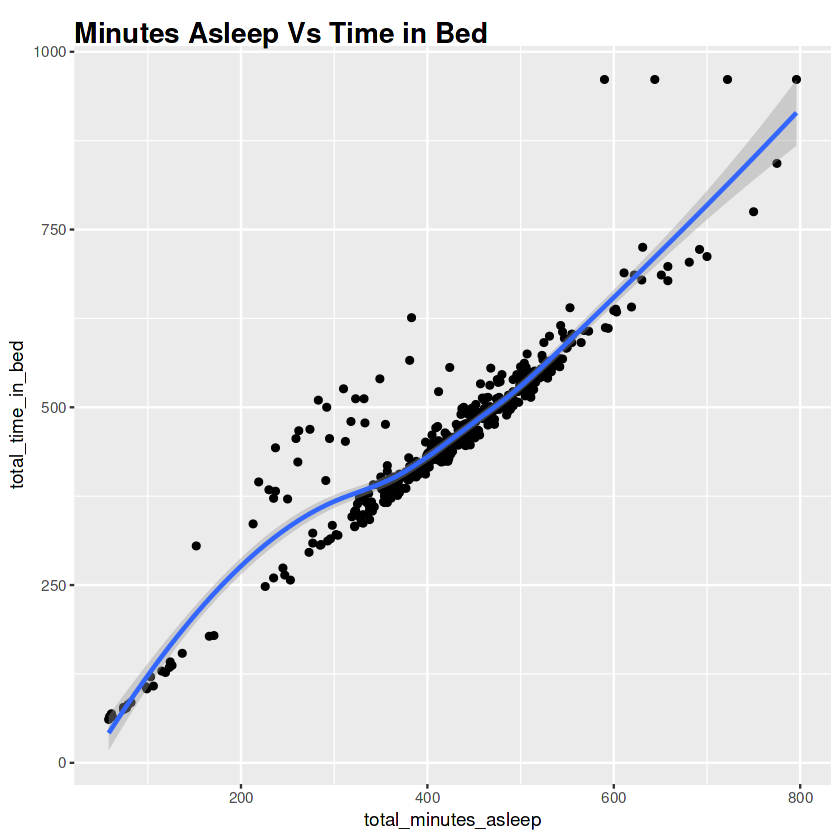

In [23]:
ggplot(data=sleep_day, aes(x=total_minutes_asleep, y=total_time_in_bed)) + geom_point() +
geom_smooth() + theme(plot.title = element_text(size = rel(1.5), face="bold", vjust=-1)) +
labs(title = "Minutes Asleep Vs Time in Bed")

As we might expect, we can see here an almost completely linear trend between Minutes Asleep 
and Time in Bed. So to help users improve their sleep, the company should consider using 
notification to go to sleep.

### Relationship between Steps and Calories

What’s the relationship between steps taken and Calories ?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


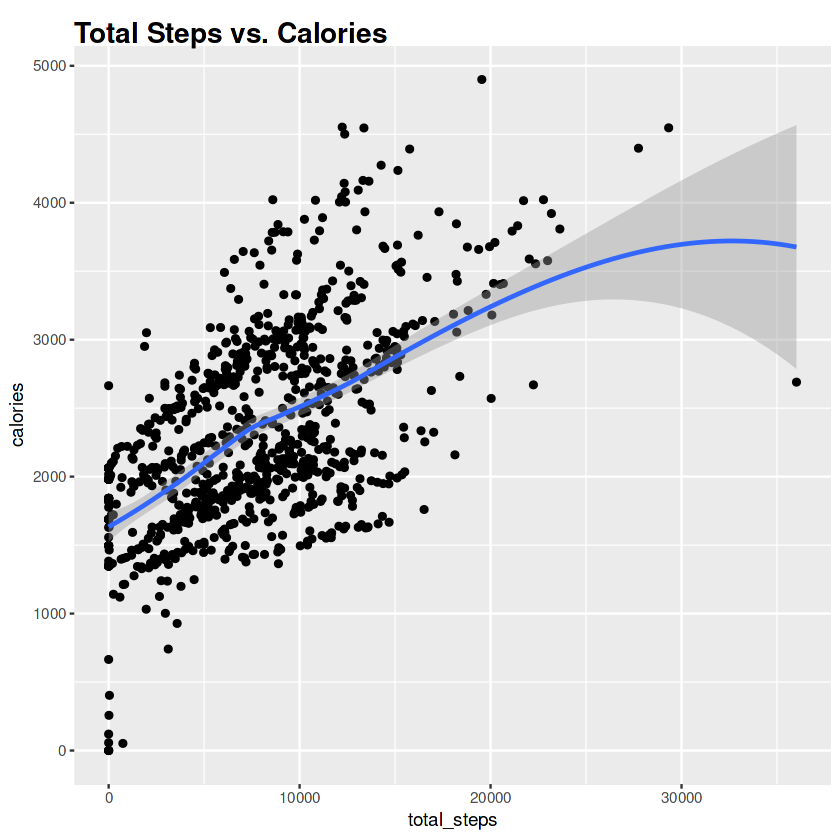

In [24]:
ggplot(data=daily_activity, aes(x=total_steps, y=calories)) + geom_point() + 
geom_smooth() + theme(plot.title = element_text(size = rel(1.5), face="bold", vjust=-1)) +
labs(title="Total Steps vs. Calories")

We can see here there's a positive correlation between Total Steps and Calories. 
The more active we are, the more calories we will burn.

### Intensities data

Now, let’s look at some Intensities data over time.
but first we need to combine the following datasets: daily_intensities and weight data frames.

In [25]:
daily_intensities$active_intensity <- (daily_intensities$very_active_minutes)/60
combined_data <- merge(weight, daily_intensities, by="id", all=TRUE)
combined_data$time <- format(combined_data$date, format = "%H:%M:%S")

***visualizing our new data frame***

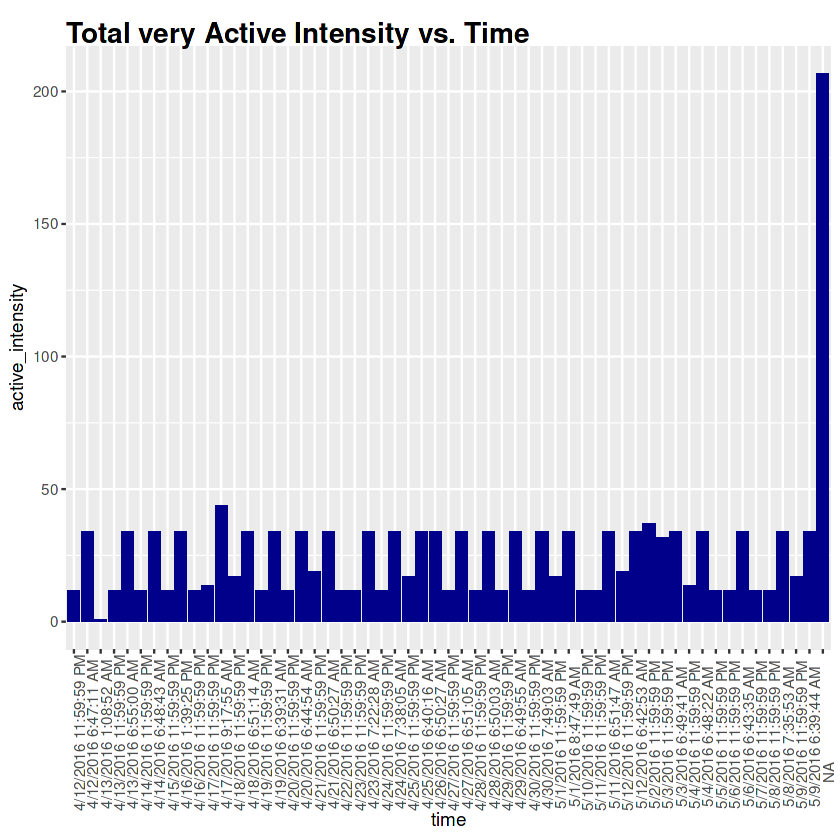

In [26]:
ggplot(data=combined_data, aes(x=time, y=active_intensity)) + geom_col(fill='darkblue')+
  theme(axis.text.x = element_text(angle = 90)) + 
theme(plot.title = element_text(size = rel(1.5), face="bold", vjust=-1)) +
  labs(title="Total very Active Intensity vs. Time ")

By analyzing some Intensity data over time. The company will have a good idea on how 
customers are using their product during the day. Most users are active before and after 
work, I suppose. The company can use this time in the Bellabeat app to remind and motivate
users to go for a run or for a walk.

### Conclusions & Recommandations for the Business
So, collecting data on activity, sleep, stress, etc. will allow the company Bellabeat to 
empower the customers with knowledge about their own health and daily habits. The company
Bellabeat is growing  rapidly and quickly positioned itself as a tech-driven wellness
company for their customers. By analyzing the FitBit Fitness Tracker Data set, I found some
insights that would help influence Bellabeat marketing strategy.

### Target Audience:

#### 1. **Profile**
   - **Occupation**: Full-time workers, likely spending significant time at a computer or in an 
   office setting.
   - **Behavior**: Engaged in light physical activity to maintain basic health but not enough to
   gain more substantial health benefits.

#### 2. **Needs**
   - **Increased Activity**: These individuals need to elevate their daily physical activity to 
   achieve better health outcomes.
   - **Healthy Habits**: They might lack the knowledge or strategies to develop and sustain healthy 
   habits.
   - **Motivation**: There is a need for consistent motivation to keep them engaged in physical 
   activity and health-related practices.

#### 3. **Challenges**
   - **Sedentary Lifestyle**: Long hours at the computer and in the office lead to a sedentary
   lifestyle, increasing the risk of health issues.
   - **Time Constraints**: Their busy schedules may make it difficult to incorporate more intensive or frequent physical activities.

#### 4. **Potential Strategies**
   - **Educational Content**: Provide users with resources and information on how
   to develop and maintain healthy habits.
   - **Motivational Tools**: Use app features like notifications, reminders, and 
   challenges to keep users motivated and engaged.
   - **Tailored Activities**: Recommend simple, effective exercises that can be done in 
   short bursts throughout the day, especially during work breaks.
   - **Health Benefits Focus**: Emphasize the long-term health benefits of increasing daily
   activity beyond light exercise, appealing to their desire to stay in shape and be healthy.

By understanding this target audience, Bellabeat can design marketing campaigns, app features, 
and content that cater specifically to their needs, helping them to improve their physical
activity levels and overall health.

## Message to the Company
The Bellabeat app need to be a unique fitness activity app. By becoming a companion guide (like a friend)
to its users and customers and help them balance their personal and professional life with healthy habits.

##Recommendations to the Bellabeat Marketing team


#### 1. **High Sedentary Time**
   - **Observation**: Users are spending more than 16 hours a day in sedentary activities.
   - **Implication**: Excessive sedentary time poses health risks and needs to be addressed.
   - **Strategy**:
     - Focus marketing efforts on the customer segment with high sedentary time.
     - Encourage users to start walking more by tracking their daily steps.
     - Implement app notifications to remind users to increase their activity levels.

#### 2. **Average Sleep Duration**
   - **Observation**: Users sleep an average of 7 hours per night.
   - **Implication**: While 7 hours is within a typical range, improving sleep quality could be beneficial.
   - **Strategy**:
     - Use app notifications to remind users to go to bed at an appropriate time.
     - Suggest reducing sedentary time as part of improving overall sleep quality.

#### 3. **Steps Per Day**
   - **Observation**: Users are averaging 7,638 steps per day, which is below the CDC’s recommendation of 8,000 steps.
   - **Implication**: Not reaching the recommended step count can increase health risks.
   - **Strategy**:
     - Encourage users to aim for at least 8,000 steps per day.
     - Educate users on the health benefits of reaching 8,000 to 12,000 steps daily, such as significantly lowering the risk of mortality.

#### 4. **Activity Intensity**
   - **Observation**: Users are most active before and after work.
   - **Implication**: These times are key for encouraging more physical activity.
   - **Strategy**:
     - Analyze intensity data to understand user activity patterns throughout the day.
     - Use peak activity times to send motivational reminders via the Bellabeat app, encouraging users to engage in activities like running or walking.

#### 5. **Weight Loss and Calorie Control**
   - **Observation**: Some users may be focused on weight loss.
   - **Strategy**:
     - Suggest monitoring daily calorie intake as part of weight management.
     - Provide users with ideas for low-calorie, healthy meals, particularly for lunch and dinner, 
     through the Bellabeat app.
